In [84]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import scipy

In [85]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Loaded image has shape: (1240, 1754, 4)


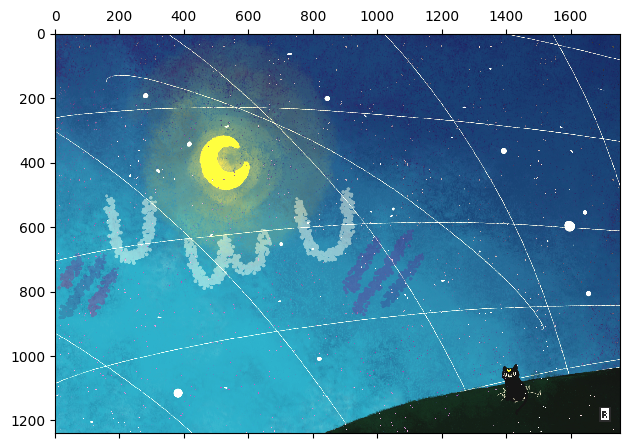

In [86]:
imgdata = skimage.io.imread("starry_nyaight.png")
print(f"Loaded image has shape: {imgdata.shape}")

fig, imgax = plt.subplots()
imgax.matshow(imgdata)

fig.tight_layout()

In [87]:
from PIL import Image

# Open the 4-channel image
image = Image.open('starry_nyaight.png')

# Check if the image has an alpha channel
if image.mode == 'RGBA':
    # Convert the image to RGB
    rgb_image = image.convert('RGB')
    
    # Save or use the RGB image
    rgb_image.save('3_channel_image.png')
    
    # Display the image (optional)
    rgb_image.show()
else:
    print("Input image is not 4-channel RGBA image.")


Loaded image has shape: (1240, 1754, 3)


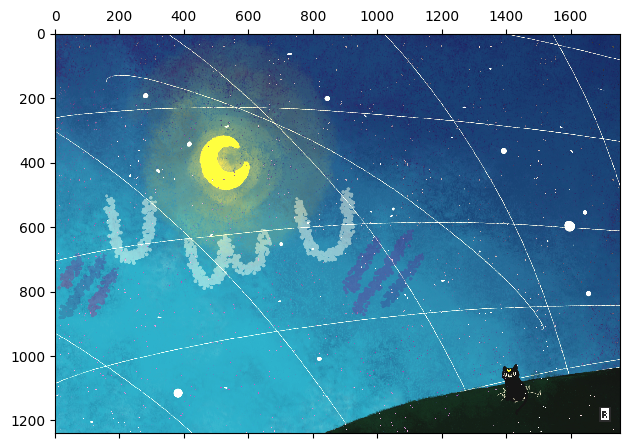

In [88]:
imgdata = skimage.io.imread("3_channel_image.png")
print(f"Loaded image has shape: {imgdata.shape}")

fig, imgax = plt.subplots()
imgax.matshow(imgdata)

fig.tight_layout()

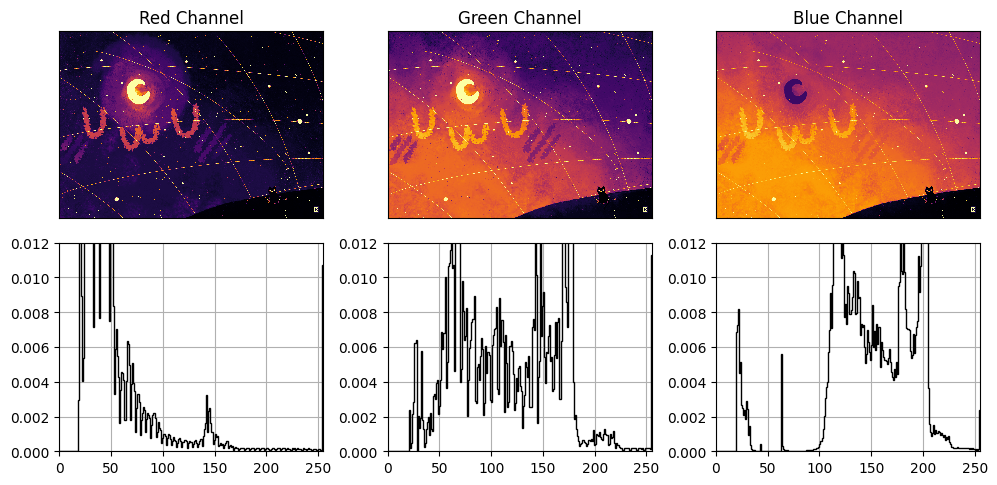

In [89]:
fig, ax_set = plt.subplots(2,3, figsize=(10,5))

names = ["Red Channel", "Green Channel", "Blue Channel"]

binning = np.arange(256)

for idx, ax in enumerate(ax_set.T):
    imax, histax = ax

    imax.matshow(imgdata[:,:,idx], cmap='inferno')
    imax.set(**{
        'xticks': [],
        'yticks': [],
        'title': names[idx]
    })


    histax.hist(imgdata[:,:,idx].flatten(), bins=binning, 
                density=True, color='black', histtype='step')
    histax.grid()
    histax.set_ylim(0, 0.012)
    histax.set_xlim(binning.min(), binning.max())

fig.tight_layout()

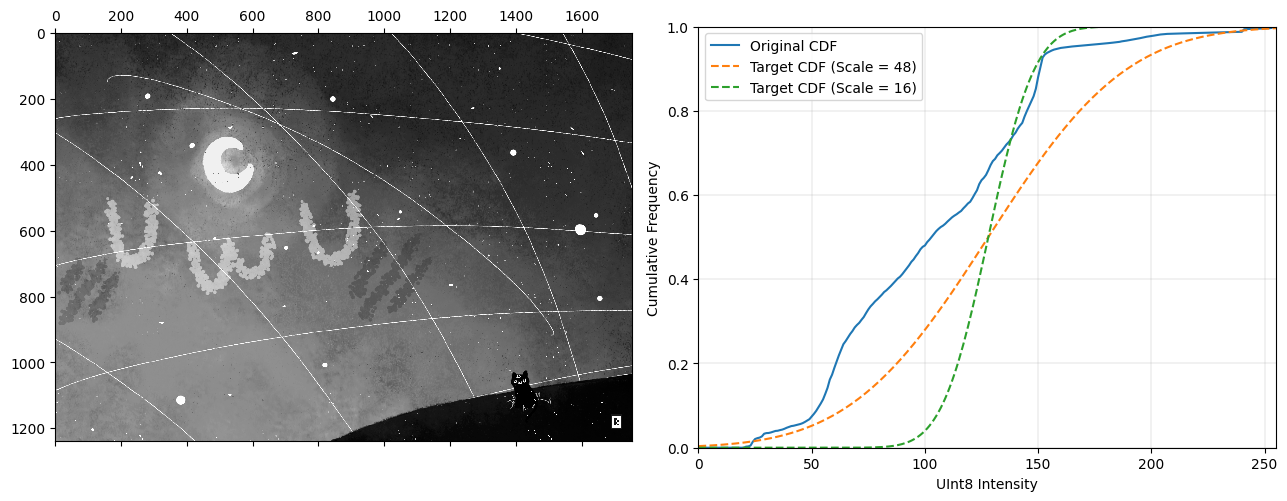

In [90]:
imggray = skimage.color.rgb2gray(imgdata)
imggray = skimage.util.img_as_ubyte(imggray)

u8bins = np.arange(256)

heights, bins = np.histogram(imggray, bins=u8bins, density=True)


fig, ax = plt.subplots(1,2, figsize=(13,5))

ax[0].matshow(imggray, cmap='gray')

histax = ax[1]
# Initial distribution
histax.plot(bins[:-1], heights.cumsum(), label="Original CDF")
# Target distributions
histax.plot(u8bins, scipy.stats.norm.cdf(np.arange(256), loc=128, scale=48),
            "--", label="Target CDF (Scale = 48)")
histax.plot(u8bins, scipy.stats.norm.cdf(np.arange(256), loc=128, scale=16),
            "--", label="Target CDF (Scale = 16)")

# Cosmetic Stuff
histax.set(ylim=(0,1), xlim=(0,255), xlabel='UInt8 Intensity',
        ylabel='Cumulative Frequency')

histax.grid(linewidth=0.25)
histax.legend()
fig.tight_layout()

1.0 0.003921568627450981 0.00469958801828605


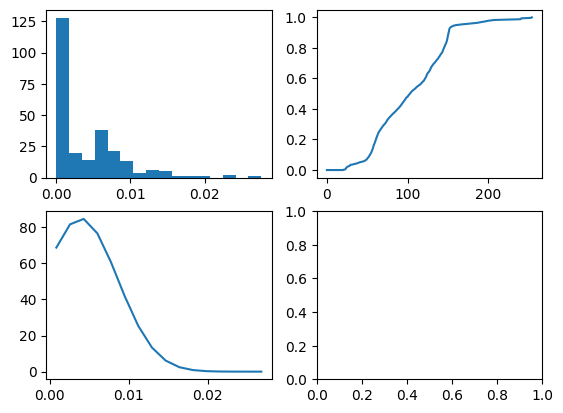

In [91]:
#heights_clean = heights[heights>0.001]
heights_clean = heights
hist, bins_g = np.histogram(heights_clean, bins=16, density=True)
bin_centers = (bins_g[:-1] + bins_g[1:])/2


mu , std = scipy.stats.norm.fit(heights_clean)
#mu = 0.5
#std=10

pdf = scipy.stats.norm.pdf(bin_centers,mu,std)


fig, axs = plt.subplots(2,2)
axs[0,0].hist(heights_clean, bins=16)
axs[0,1].plot(bins[:-1],heights_clean.cumsum())

backprojection = scipy.stats.norm.cdf(heights_clean.cumsum(), loc=mu, scale=std)
axs[1,0].plot(bin_centers,pdf)

print(backprojection[128],mu,std)